<center>
<p><img src="https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png" width="150">
</p>



<h1>Introducción a la Ciencia de Datos y sus Metodolgías</h1>

<h3>Proyecto Final: Uso de base de datos de MySQL a través de JupyterNotebook: el caso del índice de marginación municipal en México, 2020 </h3>

<p> Alumno </p>
<p> Santiago Francisco Robles Tamayo </p>

<p> Profesor </p>
<p> Dr. Juan Pablo Soto Barrera </p>

</center>

# **Introducción**

El presente trabajo consiste en una serie de pasos para llamar a una base de datos de interés, cargada en SQL, a través de un editor de texto para hacer un breve análsis exploratorio de datos (EDA). En este caso, se elegió la base de datos del Índice de Marginación Municipal en Sonora, 2020, de la Comisión Nacional de Población (CONAPO), para trabajarla en VisualStudioCode en Python. Una vez cargada en MySQL —Nueva base > Schemas > Table data import Wizard— e instaladas las librerías, se muestra el código necesario para ejecutar consultas desde el editor de texto a MySQL. Luego, se crea el motor para conectar el script de JupyterNotebook. La siguiente sección está dedicada a crear los diferentes data frames, subconjuntos de la base en MySQL, para  el análisis explotario de datos. La parte final consiste en una breve descripción de los gráficas generadas.

# **1. Instar y llamar las librerías correspondientes**

Una vez cargada la base de datos de Excel en MySQL —Nueva base > Schemas > Table data import Wizard—, se instala el paquete `sqlalchemy`, el cual nos permite llamar a una base de datos desde el editor de texto.

In [3]:
!pip install sqlalchemy

You should consider upgrading via the 'c:\users\santi\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


Después, importamos las librerías y funciones necesarias.

In [1]:
import pymysql
import pandas as pd
from sqlalchemy import create_engine

# **2. Se define el la función de "EjecutaCunsulta" para poder llamar a la base de datos de MySQL guaradada en el equipo**

Las siguientes líneas de código son para generar las comandos con los que se ejecutan los llamados de la base de datos en MySQL al editor de texto.

In [2]:
def EjecutaConsulta(consulta, connString): # Ejecuta un procedimiento almacenado sin parámetros
  # create cursor
  connection = pymysql.connect(host=connString[2], port=connString[3],
                         user=connString[0],
                         password=connString[1],
                         db=connString[4])   
  cursor=connection.cursor()

  validar = consulta[0:6].upper()
  if validar != "SELECT":
    return None

  try:
    # Execute query
    sql = consulta
    cursor.execute(sql)

    # Fetch all the records
    result = cursor.fetchall()
    field_names = [i[0] for i in cursor.description]
    df = pd.DataFrame(result, columns=field_names)
    
    #engine.dispose()
    connection.close()

    return df
  except:
    #engine.dispose()
    connection.close()
    return None

# **3. Se crea el motor para poder conectar el script de Jupyter con MySQL**

En esta sección especificamos el usuario, contraseña, entrada, puerto y nombre que se maneja en MySQL para poder llamar a la base de datos.

In [ ]:
#db_data = 'mysql+mysqldb://' + 'user' + ':' + 'micontraseña' + '@' + 'mydb.123456789012.us-east-1.rds.amazonaws.com' + ':3306/' \
  #           + 'Diabetes'
#engine = create_engine(db_data)

In [3]:
myUser = 'root'
myPass = 'Fisher85!MySQL'
myEndpoint = 'localhost' # Endpoint, para base local es localhost
myPort = 3306
myDb = 'proyecto'

myDataConnect = [myUser, myPass, myEndpoint, myPort, myDb]

# **4. Se generan los dataframes correspondientes para analizar el índice de marginación promedio por estado, población total y porcentaje promedio estatal de personas con máximo dos salarios mínimos, para 2020**


Lo siguinte es hacer las lineas de comando necesarias para hacer gráficas de barra, en orden ascendente, del promedio estatal de las tres variables seleccionadas. A pesar de que el índice de marginación y sus componentes están a nivel municipal, en MySQL se generó una vista con los promedios estatales de las variables y, así, usarlo como un data frame en VisualStudioCode.

La primer variable que se grafica es el índice de marginación municipal promedio por estado. Para generar su gráfica de barras, primero se crea un objeto llamado SQL, que es igual a la línea de código de SQL que se usa para llamar a la columna de interés (en este caso, el índice de marginación municipal promedio por estado) . Después, se crea un data frame con esta columna, el cual llamamos `df_IM_2020`, con el comando `EjecutaConsulta(sql, myDataConnect)`; la entrada `sql` corresponde el objeto previamente creado, formado de los datos de interés, y `myDataConnect`, que contiene el usuario, contraseña, entrada, puerto y nombre de MySQL en el equipo en cuestión.

In [4]:
sql = "SELECT * FROM promedio_por_estado_imm_2020 order by IM_2020_promedio;"
df_IM_2020 = EjecutaConsulta(sql, myDataConnect)
df_IM_2020.head()
df_IM_2020 = EjecutaConsulta(sql, myDataConnect)

Una vez creado el data frame `df_IM_2020`, se grafica con el siguiente código. 

<AxesSubplot: xlabel='Estado', ylabel='Índice de marginación promedio por Entidad'>

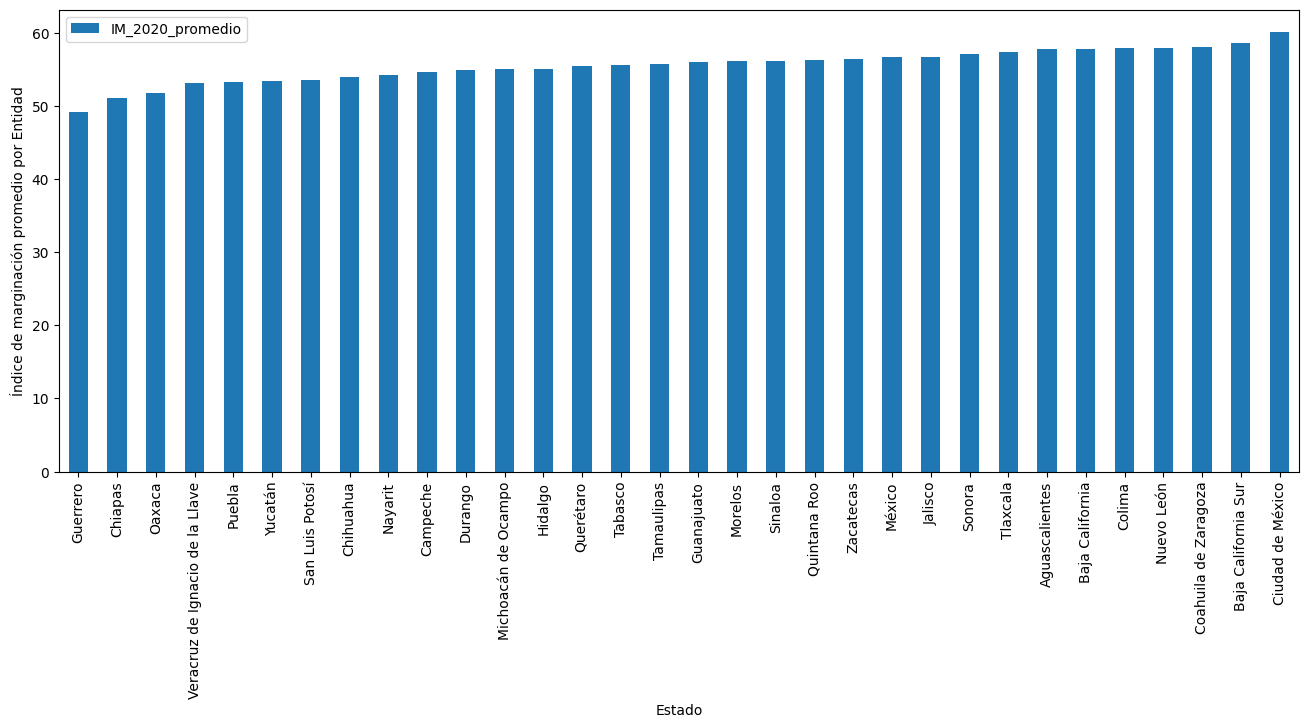

In [5]:
df_IM_2020.plot(x="NOM_ENT", y="IM_2020_promedio", kind="bar", xlabel='Estado', ylabel='Índice de marginación promedio por Entidad', figsize=(16,6))

Es necesario recordar que hay una relación inversa entre el índide de marginación y el grado de marginación. Por lo tanto, dado que la gráfica anterior muestra a los estados por su índice de marginación municipal promedio por estado en orden ascendente, los primeros estados de la gráfica (izquierda) son los que tienen un mayor grado de marginación, mientras que los últimos (derecha) son los menos marginados.

Análogamente, se aplican los mismos comandos para el caso de la población total por estado y el promedio municipal por estado del porcentaje de población con máximo 2 salarios mínimos.

In [6]:
sql = "SELECT * FROM promedio_por_estado_imm_2020 order by Población_Total;"
df_POT_TOT = EjecutaConsulta(sql, myDataConnect)
df_POT_TOT.head()
df_POT_TOT = EjecutaConsulta(sql, myDataConnect)
print(df_POT_TOT.info())
print(df_POT_TOT)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CVE_ENT                            32 non-null     object 
 1   NOM_ENT                            32 non-null     object 
 2   Población_Total                    32 non-null     object 
 3   Porcantaje_Poblacion_promedio_2SM  32 non-null     float64
 4   IM_2020_promedio                   32 non-null     float64
dtypes: float64(2), object(3)
memory usage: 1.4+ KB
None
   CVE_ENT                          NOM_ENT Población_Total  \
0       06                           Colima          731391   
1       03              Baja California Sur          798447   
2       04                         Campeche          928363   
3       18                          Nayarit         1235456   
4       29                         Tlaxcala         1342977   
5       01     

In [7]:
df_POT_TOT["Población_Total"] = pd.to_numeric(df_POT_TOT["Población_Total"])

<AxesSubplot: xlabel='Estado', ylabel='Población total'>

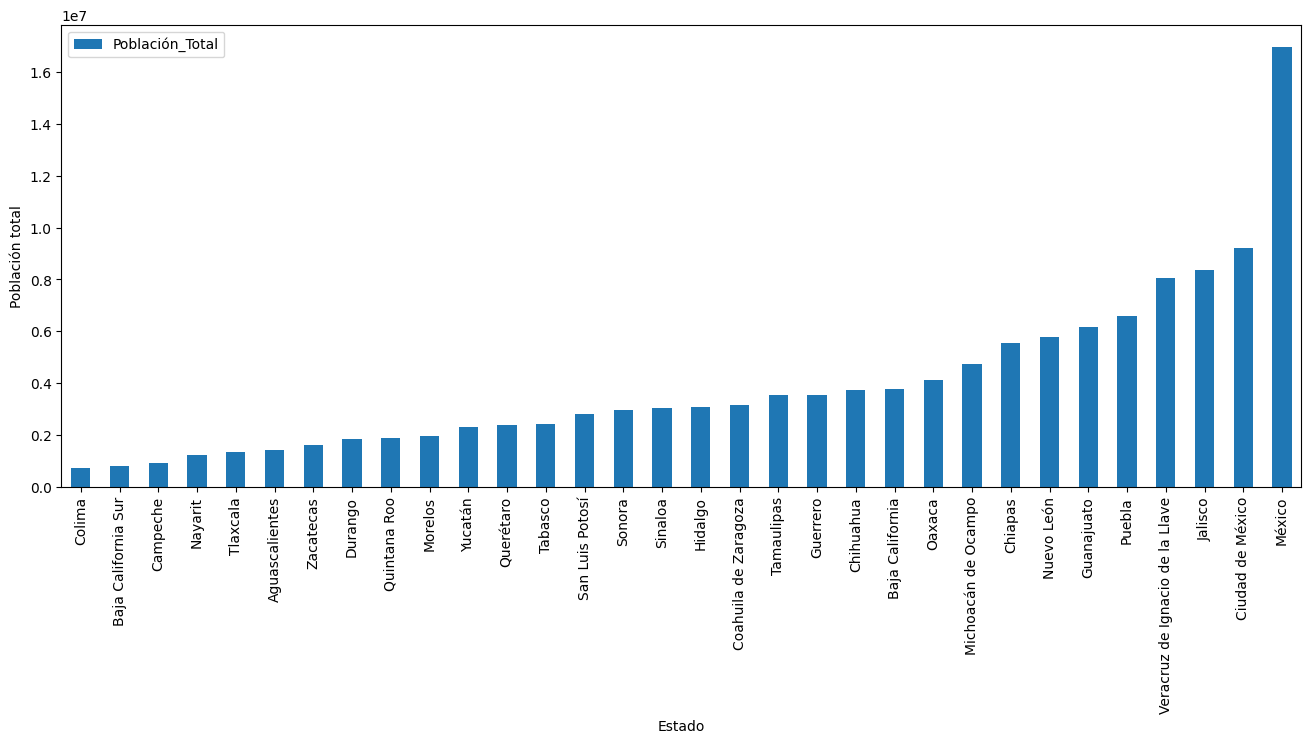

In [8]:
df_POT_TOT.plot(x="NOM_ENT", y="Población_Total", kind="bar", xlabel='Estado', ylabel='Población total', figsize=(16,6))

La población estatal total en 2022 también se graficó de forma ascendente. El orden es sumamente heterogeneo: al menos visualmente, no hay una relación entre el índice de marginación y la población total. Por ejemplo, Chiapas y Nuevo León tienen casi la misma población, pero ambos reflejan los extremos en índice de marginación.

In [9]:
sql = "SELECT * FROM promedio_por_estado_imm_2020 order by Porcantaje_Poblacion_promedio_2SM"
df_2SM = EjecutaConsulta(sql, myDataConnect)
df_2SM.head()
df_2SM = EjecutaConsulta(sql, myDataConnect)
print(df_2SM.info())
print(df_2SM)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CVE_ENT                            32 non-null     object 
 1   NOM_ENT                            32 non-null     object 
 2   Población_Total                    32 non-null     object 
 3   Porcantaje_Poblacion_promedio_2SM  32 non-null     float64
 4   IM_2020_promedio                   32 non-null     float64
dtypes: float64(2), object(3)
memory usage: 1.4+ KB
None
   CVE_ENT                          NOM_ENT Población_Total  \
0       03              Baja California Sur          798447   
1       09                 Ciudad de México         9209944   
2       19                       Nuevo León         5784442   
3       06                           Colima          731391   
4       23                     Quintana Roo         1857985   
5       14     

<AxesSubplot: xlabel='Estado', ylabel='Porcentaje promedio de población con máximo 2SM'>

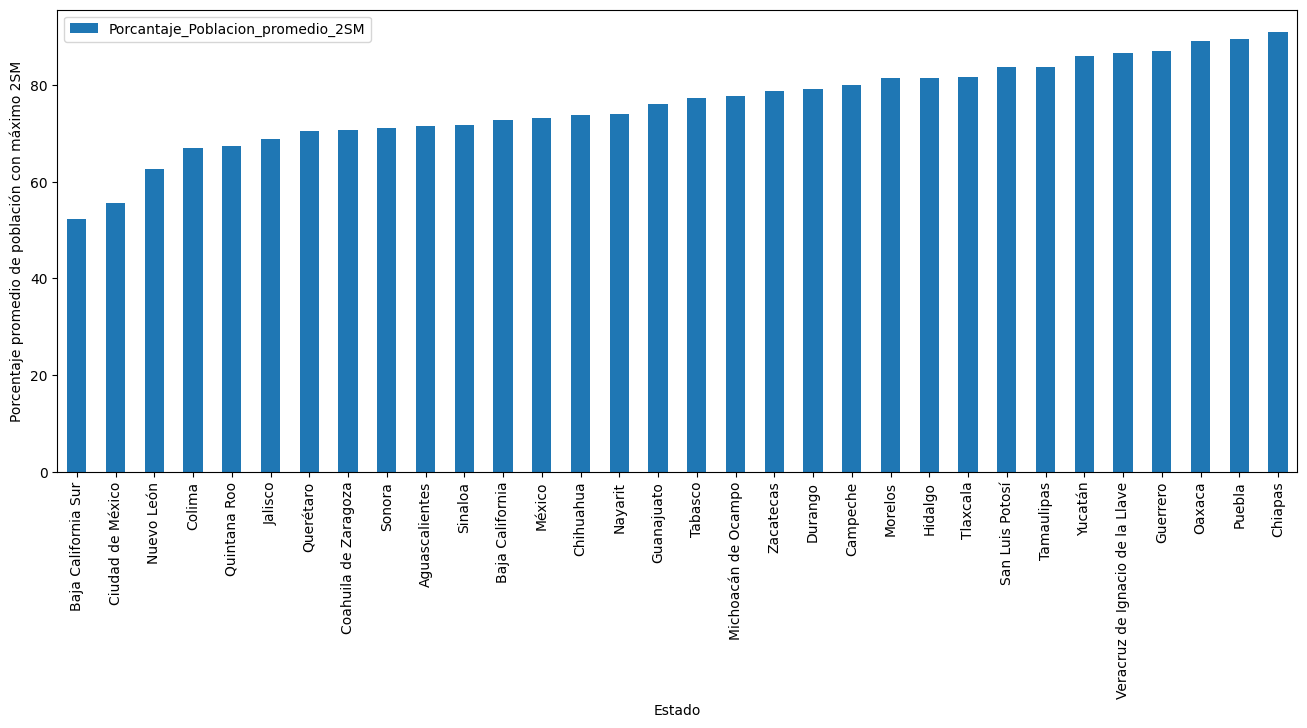

In [36]:
df_2SM.plot(x="NOM_ENT", y="Porcantaje_Poblacion_promedio_2SM", kind="bar", xlabel='Estado', ylabel='Porcentaje promedio de población con máximo 2SM', figsize=(16,6))

A diferencia de la población, al menos visualmente, sí hay una relación entre el índice de marginación y el promedio municipal por estado del porcentaje de población con máximo 2 salarios mínimos. Se aprecia en los extremos de la gráfica: las entidades con una proporción menor de población con esta característica comparten un índide de marginación alto (bajo grado de marginación), como Ciudad de México, Nuevo León y Jalisco, a la izquierda; las entidades con una mayor proporción de personas con máximo dos salarios mínimos coinciden con varias entidades que tienen un alto grado de marginación, como Guerrero, Oaxaca, Puebla y Chiapas, por la derecha.

Para visualizar mejor la relación entre ambas variables, se realiza una gráfica de dispersión del índice de marginación municipal promedio por estado contra el promedio municipal por estado del porcentage de población con máximo dos salarios mínimos.

In [17]:
sql = "SELECT * FROM promedio_por_estado_imm_2020;"
df_data_avg = EjecutaConsulta(sql, myDataConnect)
df_data_avg.head()

,CVE_ENT,NOM_ENT,Población_Total,Porcantaje_Poblacion_promedio_2SM,IM_2020_promedio
0,01,Aguascalientes,1425607,71.46,57.78
1,02,Baja California,3769020,72.75,57.78
2,03,Baja California Sur,798447,52.21,58.63
3,04,Campeche,928363,79.99,54.68
4,05,Coahuila de Zaragoza,3146771,70.69,58.05


In [35]:
import plotly.express as px
fig = px.scatter(df_data_avg,
                 x="Porcantaje_Poblacion_promedio_2SM", 
                 y="IM_2020_promedio", 
                 color_discrete_sequence=['blue'],
                 text="NOM_ENT",
                 #marginal_x='violin', 
                 #marginal_y='violin',
                 trendline="ols",
                 trendline_color_override="red",
                 opacity=0.6,
                title = 'Gráfica 1: Índice de marginación municipal promedio por estado contra el promedio municipal por estado del porcentage de población con máximo dos salarios mínimos: 2020'
                )
fig.show()

In [34]:
import plotly.express as px
fig = px.scatter(df_data_avg,
                 x="Población_Total", 
                 y="IM_2020_promedio", 
                 color_discrete_sequence=['blue'],
                 text="NOM_ENT",
                 #marginal_x='violin', 
                 #marginal_y='violin',
                 trendline="ols",
                 trendline_color_override="red",
                 opacity=0.6,
                title = 'Gráfica 2: Índice de marginación municipal promedio por estado contra la población total por Edo.: 2020'
                )
fig.show()

La gráfica de dispersión y la línea de tendencia por mínimos cuadrados ordinarios refleja una relación negativa entre el Índice de marginación municipal promedio por estado y el porcentage de población con hasta dos salarios mínimo municipal promedio por estado, con estadísticos significativos, como $R^{2}=0.6564$, mientras que la del índice de marginación y la población no guarda relagicón alguna, con una sumamente baja de $R^{2}=0.000222$.

Por su significancia, la primer gráfica de dispersión es relevante. Recordando que entre mayor es el índide de marginación, menor es el grado de marginación, la interpretación de esta gráfica es: entre mayor es el porcentage promedio municipal por estado con hasta dos salarios mínimos, menor es el índide de marginación del estado en cuestión, lo cual refleja un mayor grado de marginación. Se aprecia de nuevo cómo Guerrero, Oaxaca, Puebla y Chiapas están al extremo derecho, mientras que Ciudad de México, Nuevo León y Jalisco están a la izquierda.

# **Conclusión**


El principal aprendizaje de este script es la **capacidad para obtener información de una base de dato en SQL, a través de un editor de texto**. Después de subir la base de datos en un lector de SQL, se intalaron las librerías necesarias; particularmente, `pymysql` y `mysqlalchemy`, para llamar a la base de datos del SQL. Posteriormente, se crearon las lineas de código requeridas para hacer el llamado de datos desde el editor de texto a SQL. Una vez establecidad estas funciones, se generaron los data frames con los cuales se analizó la relación del índide de marginación promedio estatal con la población y el porcentage de población promedio municipal, por estado, con hasta dos salarios mínimos. Esta última variale guardó una relación negativa, significativa, con el índice de marginación: entre mayor es el porcentage promedio municipal por estado con hasta dos salarios mínimos, menor es el índide de marginación del estado en cuestión, lo cual refleja un mayor grado de marginación.

# **Referencias**

* Scatter Plots in Python. (n.d.). Plotly Graphing Libraries. https://plotly.com/python/line-and-scatter/